In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 양현종 선수 경기 별 기록 데이터 크롤링 -> csv파일 저장

In [13]:
# 경기 별 기록 크롤링 -> to csv

def get_game_by_game_records(player_code):
    player_url = f"https://www.koreabaseball.com/Record/Player/PitcherDetail/Game.aspx?playerId={player_code}"
    response = requests.get(player_url)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to fetch game-by-game records for player code: {player_code}")
        return None

def parse_game_by_game_records(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    h5_elements = soup.find_all('div', {'class': 'tbl-type02 tbl-type02-pd0 mb35'})
    if not h5_elements:
        print("No game-by-game records found.")
        return None

    dataframes = []
    for h5_element in h5_elements:
        table = h5_element.find_next('table')
        if not table:
            continue

        headers = [header.text.strip() for header in table.find_all('th')]
        data_rows = []
        for row in table.find_all('tr')[1:]:
            data_row = [cell.text.strip() for cell in row.find_all('td')]
            data_rows.append(data_row)

        df = pd.DataFrame(data_rows, columns=headers)
        dataframes.append(df) 

    return dataframes

def save_as_csv(dataframes, filename):
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

if __name__ == "__main__":
    player_code = input("Enter the player code: ")
    
    game_by_game_records_html = get_game_by_game_records(player_code)
    if game_by_game_records_html:
        dataframes = parse_game_by_game_records(game_by_game_records_html)
        if dataframes:
            save_as_csv(dataframes, f"{player_code}경기별기록.csv")

Enter the player code:  77637


Data saved to 77637경기별기록.csv


In [16]:
# 상황 별 기록 크롤링 -> to csv

def get_situation_by_game_records(player_code):
    player_url = f"https://www.koreabaseball.com/Record/Player/PitcherDetail/Situation.aspx?playerId={player_code}"
    response = requests.get(player_url)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to fetch situation-by-game records for player code: {player_code}")
        return None

def parse_situation_by_game_records(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    h5_elements = soup.find_all('div', {'class': 'tbl-type02 mb35'})
    if not h5_elements:
        print("No situation-by-game records found.")
        return None

    dataframes = []
    for h5_element in h5_elements:
        table = h5_element.find_next('table')
        if not table:
            continue

        headers = [header.text.strip() for header in table.find_all('th')]
        data_rows = []
        for row in table.find_all('tr')[1:]:
            data_row = [cell.text.strip() for cell in row.find_all('td')]
            data_rows.append(data_row)

        df = pd.DataFrame(data_rows, columns=headers)
        dataframes.append(df) 

    return dataframes

def save_as_csv(dataframes, filename):
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

if __name__ == "__main__":
    player_code = input("Enter the player code: ")
    
    situation_by_game_records_html = get_situation_by_game_records(player_code)
    if situation_by_game_records_html:
        dataframes = parse_situation_by_game_records(situation_by_game_records_html)
        if dataframes:
            save_as_csv(dataframes, f"{player_code}상황별기록.csv")

Enter the player code:  77637


Data saved to 77637상황별기록.csv


### 경기 별 기록 EDA 시각화

In [57]:
양현종_경기별기록 = pd.read_csv('77637경기별기록.csv')
양현종_경기별기록

,구분,G,ERA,W,L,SV,HLD,WPCT,TBF,IP,H,HR,BB,HBP,SO,R,ER,AVG
0,KT,1,0.00,1,0,0,0,1.000,27,6,8,0,2,0,5,1,0,0.348
1,LG,3,4.32,1,0,0,0,1.000,72,16 2/3,18,1,6,1,13,8,8,0.277
2,NC,2,5.68,0,1,0,0,0.000,56,12 2/3,17,3,5,0,5,8,8,0.333
3,SSG,3,4.15,2,1,0,0,0.667,78,17 1/3,22,0,5,0,17,8,8,0.306
4,두산,1,3.38,0,0,0,0,-,27,5 1/3,10,0,1,0,5,4,2,0.400
5,롯데,1,40.50,0,1,0,0,0.000,16,2,9,1,2,0,1,9,9,0.692
6,삼성,2,2.70,1,1,0,0,0.500,46,10,9,1,5,0,13,4,3,0.220
7,키움,3,0.47,0,2,0,0,0.000,76,19,16,0,4,0,18,2,1,0.232
8,한화,1,3.86,0,0,0,0,-,29,7,7,1,1,0,5,3,3,0.269
9,고척,2,0.00,0,1,0,0,0.000,48,12,8,0,3,0,15,1,0,0.182


In [49]:
양현종_경기별기록['IP'].dtypes

dtype('O')

In [58]:
# 이닝 컬럼을 아웃카운트 컬럼으로 변경하여 연산이 가능하도록 변경

def ip_to_outs(ip_str):
    innings, _, outs = ip_str.partition(' ')
    if '/' in outs:
        numerator, denominator = map(int, outs.split('/'))
        return int(innings) * 3 + numerator
    else:
        return int(innings) * 3

양현종_경기별기록['OUTCOUNT'] = 양현종_경기별기록['IP'].apply(ip_to_outs)
양현종_경기별기록.drop('IP', axis=1, inplace=True)
양현종_경기별기록

,구분,G,ERA,W,L,SV,HLD,WPCT,TBF,H,HR,BB,HBP,SO,R,ER,AVG,OUTCOUNT
0,KT,1,0.00,1,0,0,0,1.000,27,8,0,2,0,5,1,0,0.348,18
1,LG,3,4.32,1,0,0,0,1.000,72,18,1,6,1,13,8,8,0.277,50
2,NC,2,5.68,0,1,0,0,0.000,56,17,3,5,0,5,8,8,0.333,38
3,SSG,3,4.15,2,1,0,0,0.667,78,22,0,5,0,17,8,8,0.306,52
4,두산,1,3.38,0,0,0,0,-,27,10,0,1,0,5,4,2,0.400,16
5,롯데,1,40.50,0,1,0,0,0.000,16,9,1,2,0,1,9,9,0.692,6
6,삼성,2,2.70,1,1,0,0,0.500,46,9,1,5,0,13,4,3,0.220,30
7,키움,3,0.47,0,2,0,0,0.000,76,16,0,4,0,18,2,1,0.232,57
8,한화,1,3.86,0,0,0,0,-,29,7,1,1,0,5,3,3,0.269,21
9,고척,2,0.00,0,1,0,0,0.000,48,8,0,3,0,15,1,0,0.182,36


In [59]:
양현종_경기별기록_상대팀 = 양현종_경기별기록[:9]
양현종_경기별기록_구장별 = 양현종_경기별기록[9:15]
양현종_경기별기록_월별 = 양현종_경기별기록[15:19]
양현종_경기별기록_요일별 = 양현종_경기별기록[19:25]
양현종_경기별기록_홈어웨이별 = 양현종_경기별기록[25:27]
양현종_경기별기록_주야간별 = 양현종_경기별기록[27:29]

### 양현종 경기별 기록 상대팀

In [60]:
# 양현종의 상대팀 별 경기 기록

양현종_경기별기록_상대팀

,구분,G,ERA,W,L,SV,HLD,WPCT,TBF,H,HR,BB,HBP,SO,R,ER,AVG,OUTCOUNT
0,KT,1,0.00,1,0,0,0,1.000,27,8,0,2,0,5,1,0,0.348,18
1,LG,3,4.32,1,0,0,0,1.000,72,18,1,6,1,13,8,8,0.277,50
2,NC,2,5.68,0,1,0,0,0.000,56,17,3,5,0,5,8,8,0.333,38
3,SSG,3,4.15,2,1,0,0,0.667,78,22,0,5,0,17,8,8,0.306,52
4,두산,1,3.38,0,0,0,0,-,27,10,0,1,0,5,4,2,0.400,16
5,롯데,1,40.50,0,1,0,0,0.000,16,9,1,2,0,1,9,9,0.692,6
6,삼성,2,2.70,1,1,0,0,0.500,46,9,1,5,0,13,4,3,0.220,30
7,키움,3,0.47,0,2,0,0,0.000,76,16,0,4,0,18,2,1,0.232,57
8,한화,1,3.86,0,0,0,0,-,29,7,1,1,0,5,3,3,0.269,21


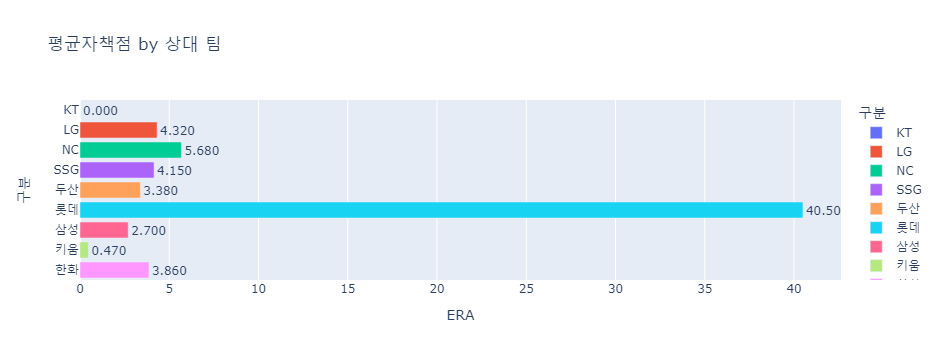

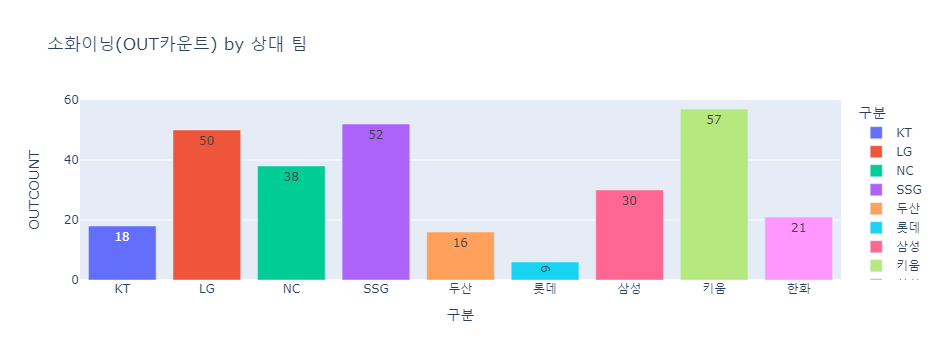

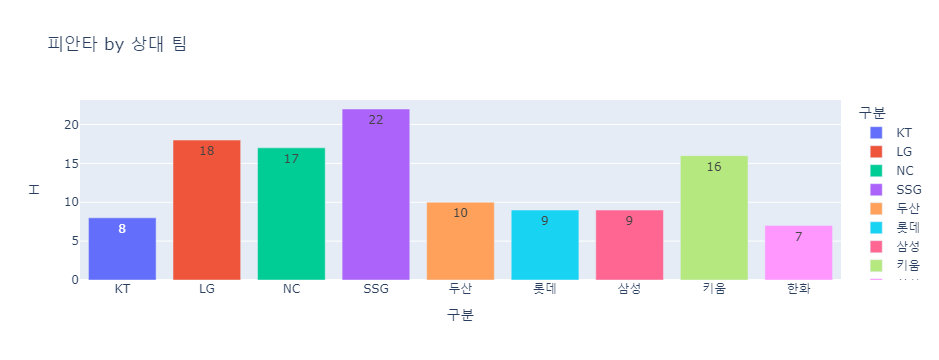

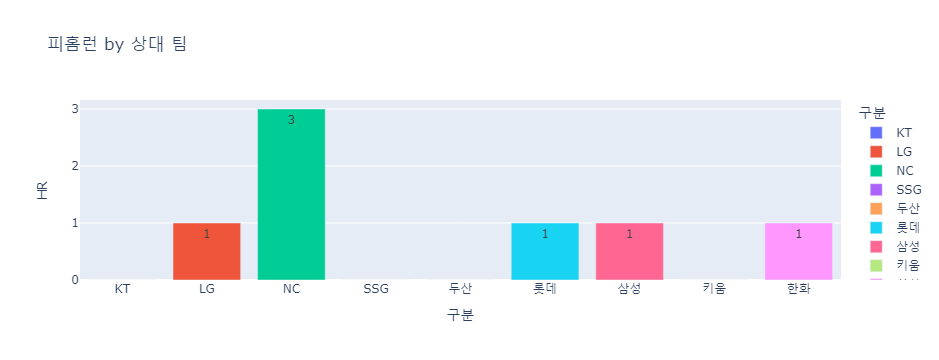

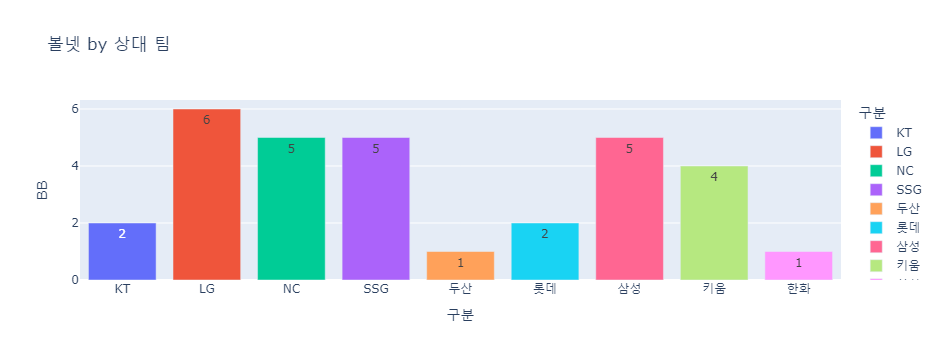

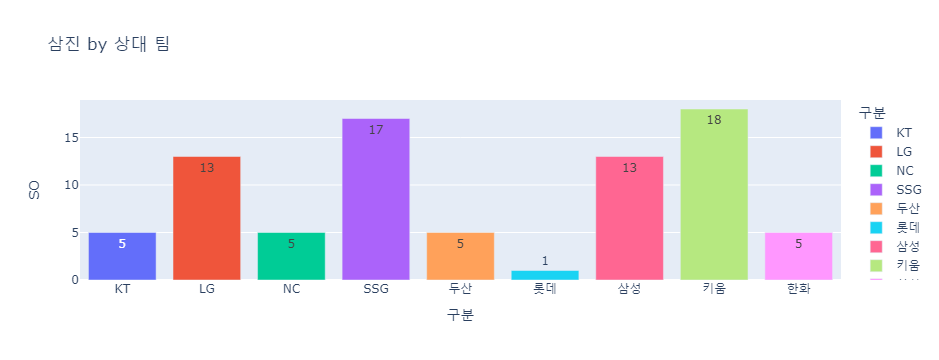

In [70]:
# 양현종 상대 팀 별 평균자책점 및 소화이닝 및 피안타, 피홈런, 볼넷, 삼진 갯수 

fig = px.bar(양현종_경기별기록_상대팀, y=양현종_경기별기록_상대팀['구분'], x=양현종_경기별기록_상대팀['ERA'], text='ERA', title='평균자책점 by 상대 팀',
             labels={'평균자책점': '평균자책점'}, color=양현종_경기별기록_상대팀['구분'])
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

fig = px.bar(양현종_경기별기록_상대팀, x=양현종_경기별기록_상대팀['구분'], y=양현종_경기별기록_상대팀['OUTCOUNT'], text='OUTCOUNT', title='소화이닝(OUT카운트) by 상대 팀',
             labels={'소화이닝': '소화이닝'}, color=양현종_경기별기록_상대팀['구분'])
fig.show()

fig = px.bar(양현종_경기별기록_상대팀, x=양현종_경기별기록_상대팀['구분'], y=양현종_경기별기록_상대팀['H'], text='H', title='피안타 by 상대 팀',
             labels={'피안타': '피안타'}, color=양현종_경기별기록_상대팀['구분'])
fig.show()

fig = px.bar(양현종_경기별기록_상대팀, x=양현종_경기별기록_상대팀['구분'], y=양현종_경기별기록_상대팀['HR'], text='HR', title='피홈런 by 상대 팀',
             labels={'피홈런': '피홈런'}, color=양현종_경기별기록_상대팀['구분'])
fig.show()

fig = px.bar(양현종_경기별기록_상대팀, x=양현종_경기별기록_상대팀['구분'], y=양현종_경기별기록_상대팀['BB'], text='BB', title='볼넷 by 상대 팀',
             labels={'볼넷': '볼넷'}, color=양현종_경기별기록_상대팀['구분'])
fig.show()

fig = px.bar(양현종_경기별기록_상대팀, x=양현종_경기별기록_상대팀['구분'], y=양현종_경기별기록_상대팀['SO'], text='SO', title='삼진 by 상대 팀',
             labels={'삼진': '삼진'}, color=양현종_경기별기록_상대팀['구분'])
fig.show()

### 양현종 경기별 기록 구장별

In [71]:
양현종_경기별기록_구장별

,구분,G,ERA,W,L,SV,HLD,WPCT,TBF,H,HR,BB,HBP,SO,R,ER,AVG,OUTCOUNT
9,고척,2,0.00,0,1,0,0,0.000,48,8,0,3,0,15,1,0,0.182,36
10,광주,9,3.38,4,3,0,0,0.571,243,65,4,14,0,47,23,21,0.293,168
11,문학,1,1.80,1,0,0,0,1.000,22,5,0,2,0,4,1,1,0.250,15
12,사직,1,40.50,0,1,0,0,0.000,16,9,1,2,0,1,9,9,0.692,6
13,잠실,3,4.11,0,0,0,0,-,71,21,1,5,1,15,9,7,0.328,46
14,창원,1,6.35,0,1,0,0,0.000,27,8,1,5,0,0,4,4,0.364,17
